In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder

### *1. Формуванння тестового та тренувального датасетів.*

In [30]:
data=pd.read_csv('banking.csv')
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


In [27]:
# Вибираємо категоріальні ознаки та кодуємо за допомогою One-Hot Encoding
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
data_encoded = pd.get_dummies(data, columns=categorical_features)

In [31]:
X = data_encoded.drop('y', axis = 1)
y = data_encoded['y']


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### *2. Застосування логістичної регресії для прогнозування цільової метрики 'y'.*

In [37]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train,y_train)


LogisticRegression(max_iter=1000)

In [39]:
y_pred = log_reg.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### *3. Оцінка моделі за допомогою матриці похибок, метрик Precision, Recall, F1-score.*

In [40]:
cnf_matrix = metrics. confusion_matrix (y_test, y_pred)
cnf_matrix

array([[10696,   285],
       [  792,   584]], dtype=int64)

<Axes: >

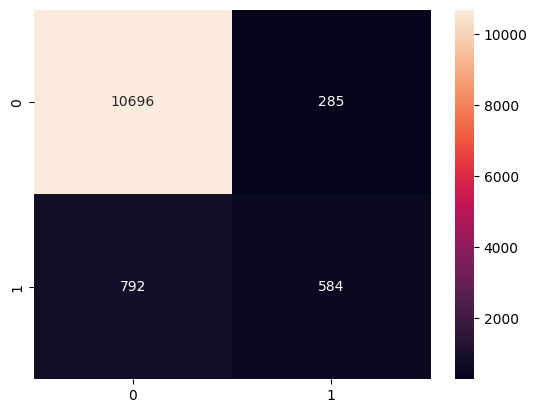

In [41]:
ax= plt.subplot()
sns.heatmap(cnf_matrix, annot=True, fmt='g', ax=ax)

In [42]:
print(" Accuracy:",metrics.accuracy_score(y_test, y_pred))

 Accuracy: 0.9128429230395727


In [43]:
print("Precision:",metrics.precision_score(y_test, y_pred))

Precision: 0.6720368239355581


In [44]:
print("Recall:",metrics.recall_score(y_test, y_pred))

Recall: 0.42441860465116277


In [45]:
print("F1:",metrics.f1_score(y_test, y_pred, average = None))

F1: [0.95206729 0.52026726]


### *3.1. Побудова AUC-ROC кривої для моделі.*

In [46]:
y_pred_proba = log_reg.predict_proba (X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve (y_test, y_pred_proba)
auc = metrics.roc_auc_score (y_test, y_pred_proba)

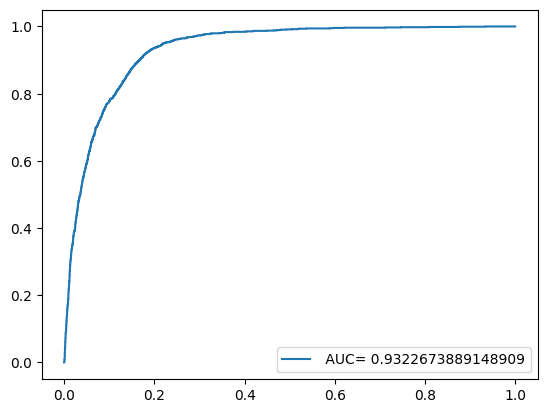

In [47]:
plt.plot (fpr,tpr,label=" AUC= "+str(auc))
plt.legend(loc=4)
plt.show()

#### Висновок: 
1. Високий показник AUC показує, що модель успішно розділяє між собою позитивні і негативні випадки.  
2. Повнота (Recall) для позитивного класу низька, що вказує на те, що модель не завжди находить все реальноь позитивні випадки.   
3. Різниця в F1 показниках свідчить про те, що модель показує різні рівні продуктивності для різних класів.